In [53]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from scipy.stats import norm

j = complex(0,1)

# Define the Aperture

In [54]:
scl = 0.1

def func(x, y, radius = 100*scl):
    R = np.sqrt(x**2+y**2)
    return np.heaviside(R, 1) - np.heaviside(R-radius, 1)

x0 = -512*scl
dx = 1*scl
x=np.arange(x0,-x0,dx)
y0 = -512*scl
dy = 1*scl
y=np.arange(y0,-y0,dy)

# Hole Getting Smaller and Smaller...

In [55]:
X, Y = np.meshgrid(x,y)
nonfour = func(X, Y)

g=np.fft.fft2(nonfour)
G = np.fft.fftshift( g )

#Normalize to Unit Area
nonfour = nonfour / nonfour.sum()
G = G / G.sum()

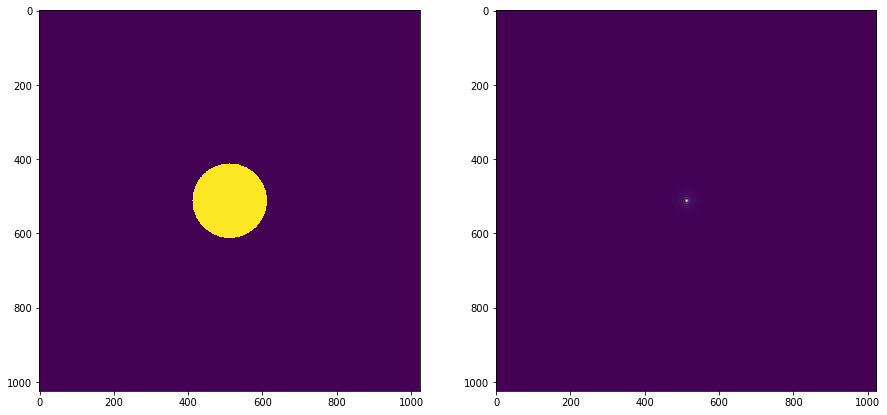

In [56]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
axes[0].imshow(nonfour)
axes[1].imshow(np.abs(G))
plt.show()

In [59]:
X, Y = np.meshgrid(x,y)
nonfour = func(X, Y, radius=30*scl)

g=np.fft.fft2(nonfour)
G = np.fft.fftshift( g )

#Normalize to Unit Area
nonfour = nonfour / nonfour.sum()
G = G / G.sum()

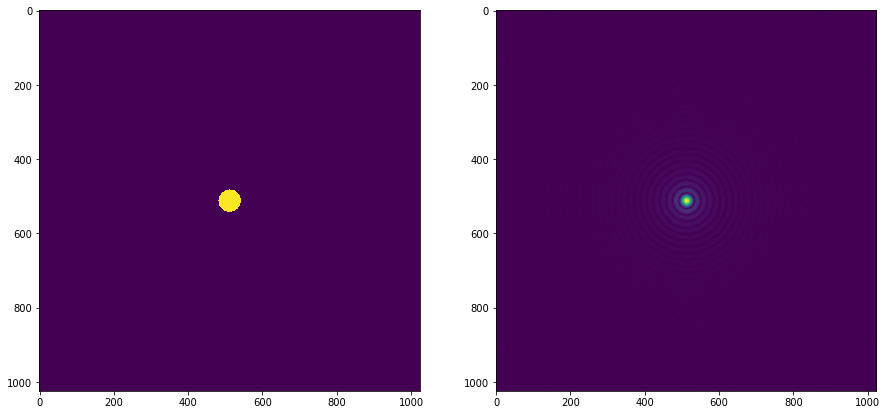

In [60]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
axes[0].imshow(nonfour)
axes[1].imshow(np.abs(G))
plt.show()

In [63]:
X, Y = np.meshgrid(x,y)
nonfour = func(X, Y, radius = 10*scl)

g=np.fft.fft2(nonfour)
G = np.fft.fftshift( g )

#Normalize to Unit Area
nonfour = nonfour / nonfour.sum()
G = G / G.sum()

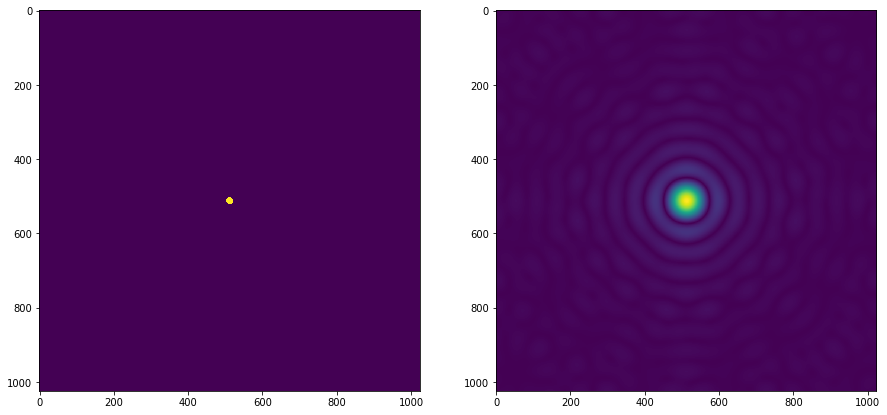

In [64]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
axes[0].imshow(nonfour)
axes[1].imshow(np.abs(G))
plt.show()